### Análise na Decomposição Salo et al. (2015)

Observação: a função criada também contabiliza as componentes disco, no entanto faz isso de forma repetitiva em casos de galáxias com dois disco. Por isso, esse número não é confiável. Com alguns ajustes na função é possível arrumar isso, mas isso ainda não foi feito.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Tabela completa -- Para comparações
SaloButa_S4G = pd.read_csv('Salo15(4629)+IRSA_S4G(2352)+Bouquin18(1931)+Buta15.csv')

#Nossa amostra final
amostra_370 = pd.read_csv('amostra_370.csv')

#Definindo colunas de interesse -- Apenas necessário na tabela completa
Colunas_interesse = SaloButa_S4G[['Name_1','Mod','Nc','Q','C','Fn','f1','mag1_1','f2','mu02','f3',
                                  'mag3','f4','mu04','f5','mag5',
                                  'mstar','dmean','type','t_1','incl','Dist','__T_','__F_']] 

#Tirando as linhas duplicadas -- uma linha para cada componente do modelo
s4g_comps = Colunas_interesse.drop(index=0) #Removendo a primeira linha, que é apenas um indice que eu uso para me
#orientar com as colunas na tabela completa, pois são muitas colunas
s4g_2277 = s4g_comps.drop_duplicates(subset='Name_1')

/tmp/ipykernel_15113/3905901823.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  SaloButa_S4G = pd.read_csv('Salo15(4629)+IRSA_S4G(2352)+Bouquin18(1931)+Buta15.csv')


In [27]:
def analise_decomp(tabela, comps = False, mods = False, plot = True, descri_plot = True):
	'''
	Recebe tabela DataFrame com os dados da decomposição de Salo+15 e devolve uma análise das componentes.
	
	Nota: A tabela do Salo possui uma linha para cada componente e estas podem ocupar as posições f1, f2, f3, f4 e f5. 
	Após uma análise na tabela, foi verificado que a maior parte das componentes são: barra, bojo, disco e núcleo (são as componentes mais presentes).
	Essa análise irá se concentrar nessas componentes. 
	
	barra -- ferrer2 -- f4
	bojo -- sersic -- f1
	disco -- expdisk -- f3
	nucleo -- psf -- f5
	
	analise_decomp(tabela, comps = True, mods = False)
	
	tabela -- tabela data frame com os dados de componente e modelo. Modelo lido como Mod e componente lido com C
    	comps -- default = True -- análise da quantidade de componentes presente na amostra 
    	mods -- default = False -- análise da quantidade de modelos presente na amostra
    	plot -- default = True -- plot o histograma do quanto cada componente representa para o modelo (comps = barra, bojo, disco e nucleo)
	'''
    
	lista_Mod = np.asarray(tabela.Mod, dtype=str)
	lista_comp = np.asarray(tabela.C, dtype=str)
	    
	if comps:
		print('De um total de ', len(tabela.drop_duplicates(subset='Name_1')), 'vemos o seguinte quantidade de componentes: \n')
		print(tabela['C'].value_counts())
	if mods:
		print('E a seguinte quantidade de modelos: \n')
		print(tabela.drop_duplicates(subset='Name_1')['Mod'].value_counts())
	    
	mask_bar = 'BAR' == tabela['C'] #Criando uma máscara para as galáxias que possuem comp barra
	mask_bojo = 'B' == tabela['C']
	mask_disc = 'D' == tabela['C']
	mask_nucleo = 'N' == tabela['C']
	    
	gals_bar =  tabela[mask_bar].dropna(subset = ['f4'])
	gals_bojo =  tabela[mask_bojo].dropna(subset = ['f1'])
	gals_disc =  tabela[mask_disc].dropna(subset = ['f3'])
	gals_nucleo =  tabela[mask_nucleo].dropna(subset = ['f5'])
	    
	if plot:
    
		print('\n\nAnálise de presença de componentes no modelo: ')
		print('De uma amostra com %.f galáxias vemos a seguinte presença das componentes:' %float(len(tabela.drop_duplicates(subset='Name_1'))),'\n')
		fig = plt.figure(figsize=(27,14))
		ax1 = fig.add_subplot(2,2,1)
		ax2 = fig.add_subplot(2,2,2)
		ax3 = fig.add_subplot(2,2,3)
		ax4 = fig.add_subplot(2,2,4)

		ax1.hist(100*gals_bar['f4'],bins=30,label='%.f comp barras'%float(len(gals_bar)))
		ax1.set_title('Contribuição da componente BARRA para o modelo -- Amostra com %.f galáxias' %float(len(gals_bar)),fontsize=15) 
		ax1.set_xlabel('Contribuição Barra/Modelo (%)',fontsize=15)
		ax1.set_ylabel('N',fontsize=15)


		ax2.hist(100*gals_bojo['f1'],bins=30,label='%.f comp bojos'%float(len(gals_bojo)))
		ax2.set_title('Contribuição da componente BOJO para o modelo -- Amostra com %.f galáxias' %float(len(gals_bojo)),fontsize=15) 
		ax2.set_xlabel('Contribuição Bojo/Modelo (%)',fontsize=15)
		ax2.set_ylabel('N',fontsize=15)

		ax3.hist(100*gals_disc['f3'],bins=30,label='%.f comp discos'%float(len(gals_disc)))
		ax3.set_title('Contribuição da componente DISCO para o modelo -- Amostra com %.f galáxias' %float(len(gals_disc)),fontsize=15) 
		ax3.set_xlabel('Contribuição Disco/Modelo (%)',fontsize=15)
		ax3.set_ylabel('N',fontsize=15)

		ax4.hist(100*gals_nucleo['f5'],bins=30,label='%.f comp nucleos'%float(len(gals_nucleo)))
		ax4.set_title('Contribuição da componente NUCLEO para o modelo -- Amostra com %.f galáxias' %float(len(gals_nucleo)),fontsize=15) 
		ax4.set_xlabel('Contribuição Nucleo/Modelo (%)',fontsize=15)
		ax4.set_ylabel('N',fontsize=15)

		#plt.yticks(fontsize=15)
		#plt.xticks(fontsize=15)
		#ax2.set_xticks([])
		ax1.tick_params(labelsize=15)
		ax2.tick_params(labelsize=15)
		ax3.tick_params(labelsize=15)
		ax4.tick_params(labelsize=15)
		plt.show()
		
	if descri_plot:
	
		print('Total de galáxias na análise:', len(tabela.drop_duplicates(subset='Name_1')))
		print(len(gals_bar)*100/len(tabela.drop_duplicates(subset='Name_1')),'% das galáxias possuem BARRA')
		print(len(gals_bojo)*100/len(tabela.drop_duplicates(subset='Name_1')),'% das galáxias possuem BOJO')
		print(len(gals_disc)*100/len(tabela.drop_duplicates(subset='Name_1')),'% das galáxias possuem DISCO')
		print(len(gals_nucleo)*100/len(tabela.drop_duplicates(subset='Name_1')),'% das galáxias possuem NUCLEO')

De um total de  2277 vemos o seguinte quantidade de componentes: 

D          2137
BAR         872
B           617
Z           502
N           491
Z1            2
Z2            2
bar           1
HALO          1
LENS          1
nucleus       1
DISL1         1
zdisk         1
Name: C, dtype: int64
E a seguinte quantidade de modelos: 

_d          367
_dbar       355
_bd         259
_dn         157
_dd         125
_z          122
_zz         113
_dbarn      109
_dbarf      103
_bdbar      103
_bdbarf      84
_dbarfn      57
_ddn         50
_bz          48
_bdd         46
_zn          31
_zzn         28
_b           26
_bdbarfn     19
_ddbar       13
_ndbar        8
_nd           6
_zbar         6
_bzz          5
_ddbarf       4
_bdn          4
_bddbarf      3
_ddbarfn      3
_ddbarn       3
_dbarnf       3
_bdbarn       3
_zzbar        2
_nbd          2
_bzn          2
_dz           1
_nbdbar       1
_ndd          1
_dnbar        1
_halozn       1
_nzz          1
_zbarn        1
_nz      

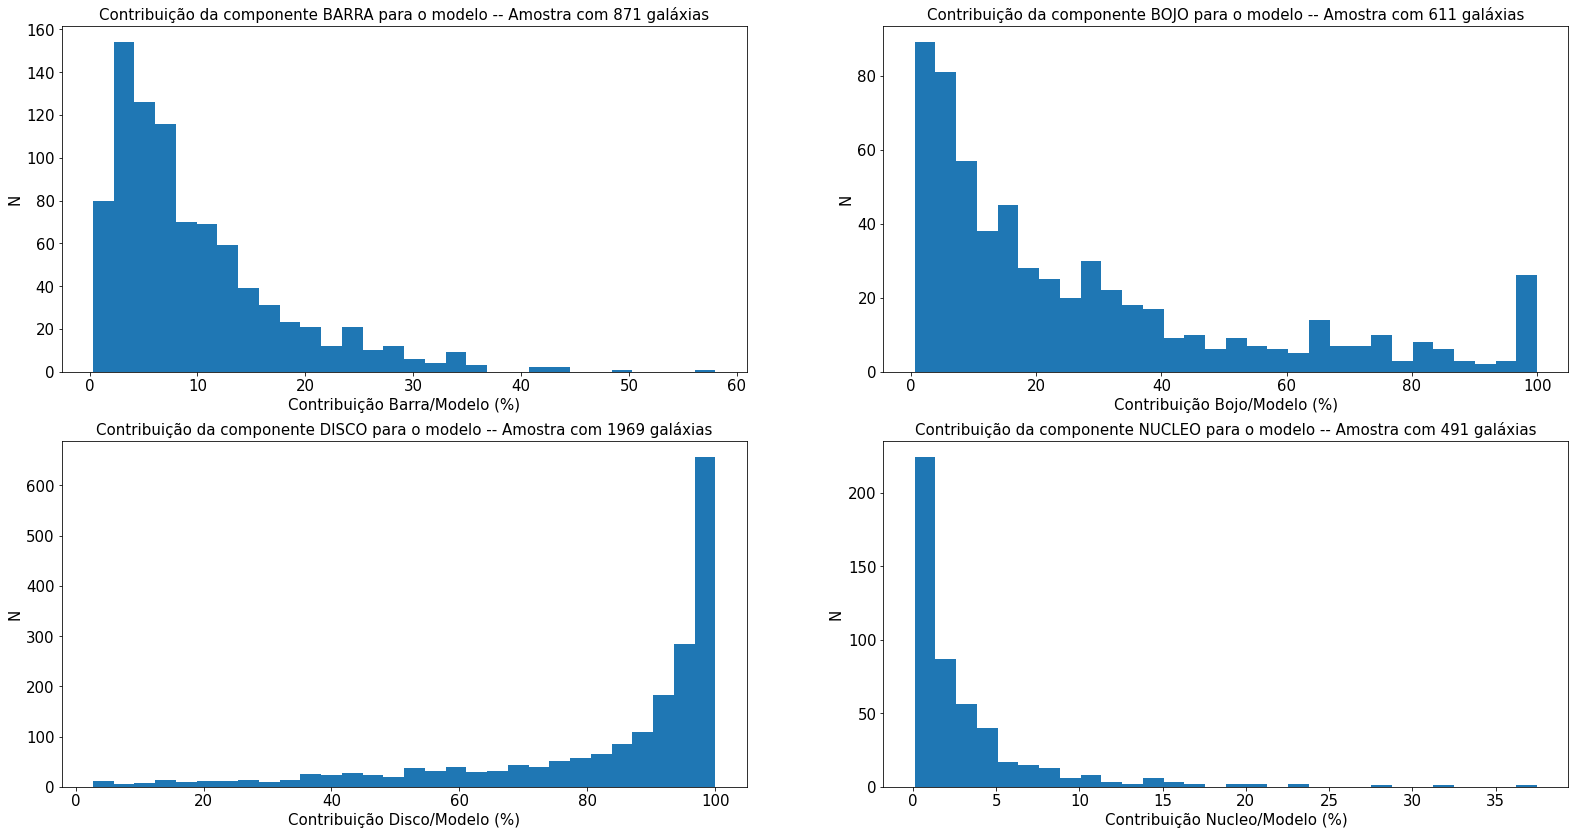

Total de galáxias na análise: 2277
38.252086078173036 % das galáxias possuem BARRA
26.833552920509444 % das galáxias possuem BOJO
86.47342995169082 % das galáxias possuem DISCO
21.563460693895475 % das galáxias possuem NUCLEO


In [4]:
analise_decomp(s4g_comps, mods=True)

In [5]:
s4g_2277.Nc.value_counts() #Numero de componentes em 2277 galáxias

2    1205
3     524
1     515
4      33
Name: Nc, dtype: int64

In [24]:
#Os cortes de massa
s4g_comps_m9 = s4g_comps[s4g_comps.mstar < 9] #massa menor que 10^9 -- galáxias anãs
s4g_comps_m9_m10 = s4g_comps[s4g_comps.mstar >= 9][s4g_comps.mstar < 10]
s4g_comps_m10 = s4g_comps[s4g_comps.mstar >= 10]
s4g_comps_m9m = s4g_comps[s4g_comps.mstar >= 9]


/tmp/ipykernel_15113/2575838493.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  s4g_comps_m9_m10 = s4g_comps[s4g_comps.mstar >= 9][s4g_comps.mstar < 10]


### Amostra apenas com critério de massa -- galáxias anãs 

E a seguinte quantidade de modelos: 

_d         231
_dbar       49
_z          46
_dd         40
_dn         15
_zz         14
_dbarf      11
_bz          8
_dbarn       6
_zn          4
_bd          3
_zbar        2
_b           1
_dbarfn      1
_bdbar       1
_bdbarf      1
_ddn         1
_zzn         1
Name: Mod, dtype: int64


Análise de presença de componentes no modelo: 
De uma amostra com 435 galáxias vemos a seguinte presença das componentes: 



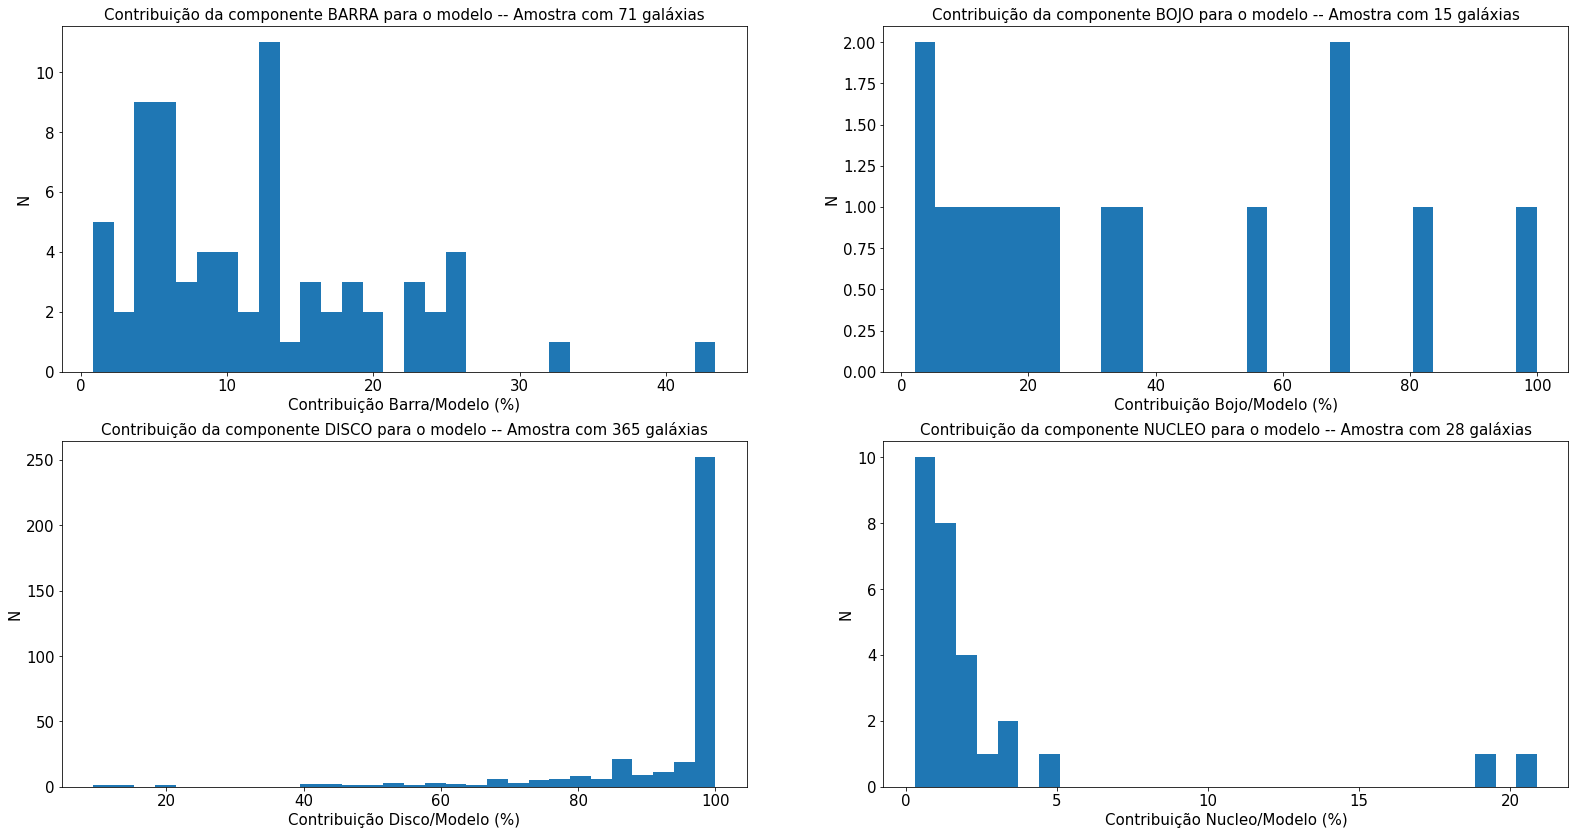

Total de galáxias na análise: 435
16.32183908045977 % das galáxias possuem BARRA
3.4482758620689653 % das galáxias possuem BOJO
83.9080459770115 % das galáxias possuem DISCO
6.436781609195402 % das galáxias possuem NUCLEO


In [7]:
analise_decomp(s4g_comps_m9,comps=False, mods=True)

In [20]:
#Numero componentes em anas
noduplicate_m9 = s4g_comps_m9.drop_duplicates(subset='Name_1')
print('Número de galáxias anãs: ', len(noduplicate_m9))
noduplicate_m9.Nc.value_counts()

Número de galáxias anãs:  435


1    278
2    146
3     11
Name: Nc, dtype: int64

In [11]:
mask_n1 = noduplicate_m9.Nc == 1
mask_disk = s4g_comps_m9.Mod == '_d'
mask_edgedisk = s4g_comps_m9.Mod == '_z'

print('Numero de galáxias anãs com apenas uma componente:',len(noduplicate_m9[mask_n1]))
print('\nEntão,', 100*len(noduplicate_m9[mask_n1])/len(noduplicate_m9),'das galáxias anãs se ajustam a apenas uma componente')

print('Sendo', len(s4g_comps_m9[mask_disk]), 'componentes disco e ', len(s4g_comps_m9[mask_edgedisk]), 'edge disk')
print('Ou seja, ', (231+46)*100/len(noduplicate_m9), 'das galáxias se ajustam bem a apenas uma componente disco')

Numero de galáxias anãs com apenas uma componente: 278

Então, 63.9080459770115 das galáxias anãs se ajustam a apenas uma componente
Sendo 231 componentes disco e  46 edge disk
Ou seja,  63.67816091954023 das galáxias se ajustam bem a apenas uma componente disco


### Galáxias massivas -- M* >= 10^9



Análise de presença de componentes no modelo: 
De uma amostra com 1834 galáxias vemos a seguinte presença das componentes: 



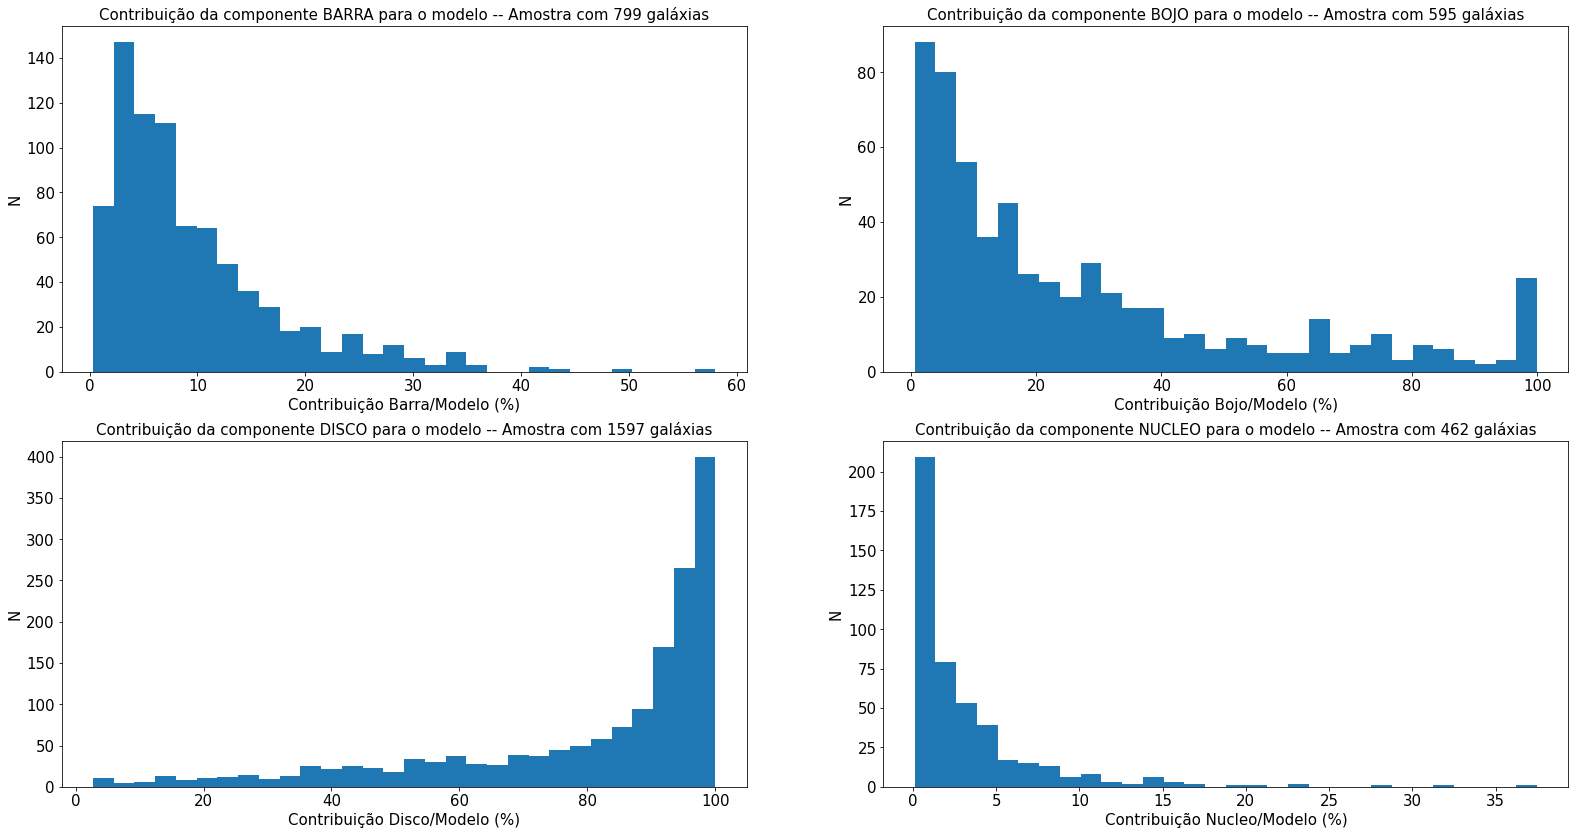

Total de galáxias na análise: 1834
43.5659760087241 % das galáxias possuem BARRA
32.44274809160305 % das galáxias possuem BOJO
87.07742639040349 % das galáxias possuem DISCO
25.19083969465649 % das galáxias possuem NUCLEO


In [14]:
analise_decomp(s4g_comps_m9m,comps=False)

In [9]:
noduplicate_m9m = s4g_comps_m9m.drop_duplicates(subset='Name_1')
noduplicate_m9m.Nc.value_counts()

2    1055
3     513
1     233
4      33
Name: Nc, dtype: int64

### Critério de inclinação menor que 65 e qualidade de decomposição 5

para focar nas barras

In [30]:
#Amostra como um todo
s4g_comps_i65 = s4g_comps[s4g_comps.incl <65] #corte de inclinação
s4g_comps_i65_q5 = s4g_comps_i65[s4g_comps_i65.Q==5] #corte de qualidade 

print('Número de galáxias da amostra como um todo: ',len(s4g_comps.drop_duplicates(subset='Name_1')))
print('Número de galáxias da amostra como um todo (i<65): ',len(s4g_comps_i65.drop_duplicates(subset='Name_1')))
print('Número de galáxias da amostra como um todo (i<65;q5): ',len(s4g_comps_i65_q5.drop_duplicates(subset='Name_1')))

Número de galáxias da amostra como um todo:  2277
Número de galáxias da amostra como um todo (i<65):  1017
Número de galáxias da amostra como um todo (i<65;q5):  953




Análise de presença de componentes no modelo: 
De uma amostra com 953 galáxias vemos a seguinte presença das componentes: 



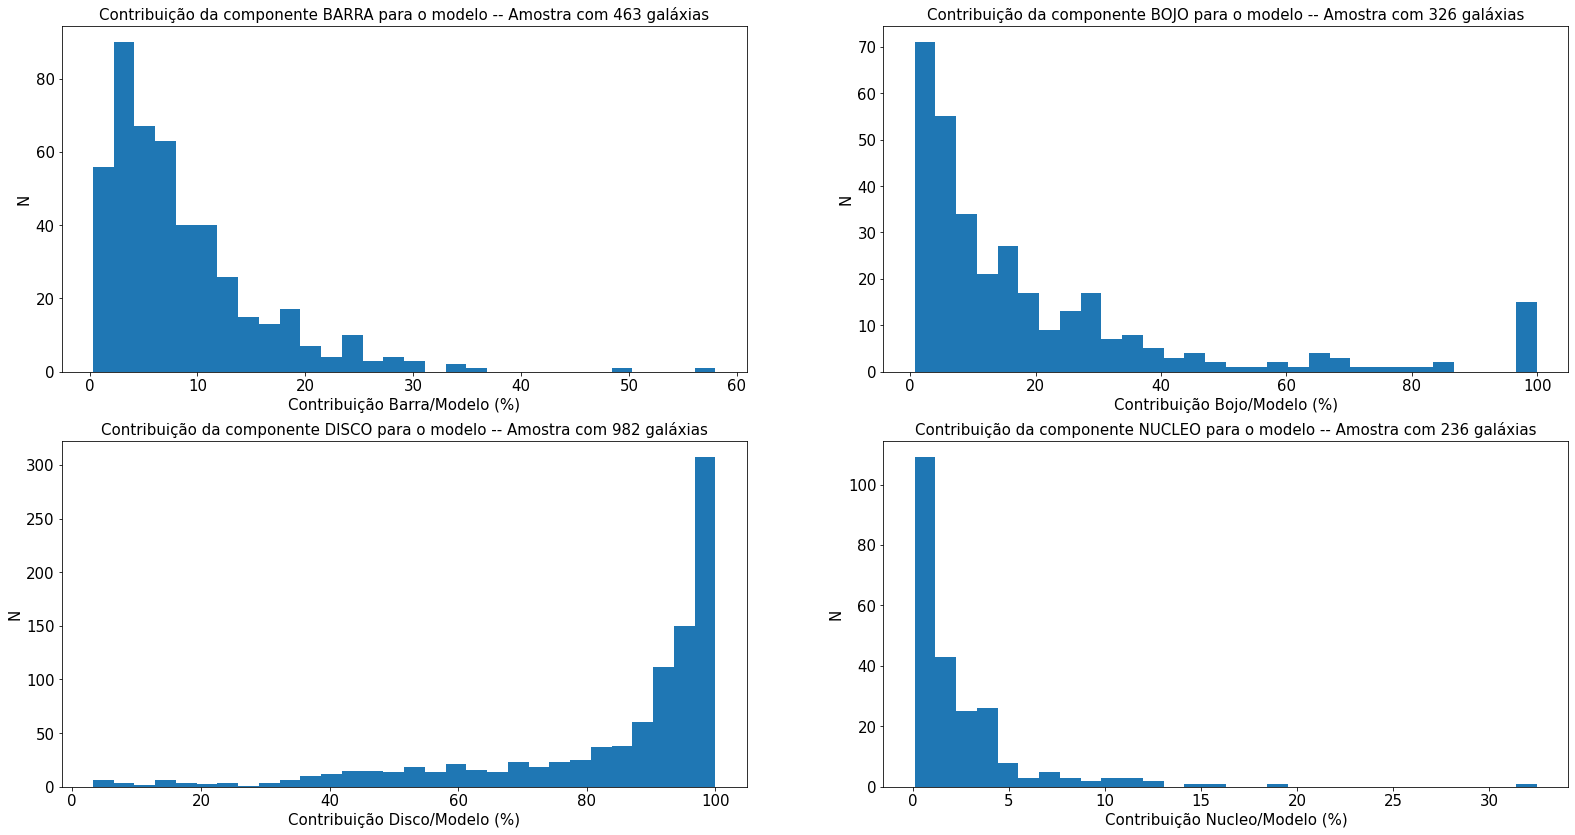

Total de galáxias na análise: 953
48.58342077649528 % das galáxias possuem BARRA
34.20776495278069 % das galáxias possuem BOJO
103.04302203567681 % das galáxias possuem DISCO
24.763903462749212 % das galáxias possuem NUCLEO


In [32]:
analise_decomp(s4g_comps_i65_q5, mods=False)

In [29]:
#galaxias anas
s4g_comps_m9_i65 = s4g_comps_m9[s4g_comps_m9.incl < 65]

noduplicate_m9_i65 = s4g_comps_m9_i65.drop_duplicates(subset='Name_1')

s4g_comps_m9_i65_q5 = s4g_comps_m9_i65[s4g_comps_m9_i65.Q == 5] #colocando criterio de qualidade 5

noduplicate_m9_i65_q5 = s4g_comps_m9_i65_q5.drop_duplicates(subset='Name_1') #Uma linha por galáxia
print('Numero de galáxias anãs: ', len(noduplicate_m9))
print('Numero de galáxias anãs (i<65): ', len(noduplicate_m9_i65))
print('Numero de galáxias anãs (i<65;q5): ', len(noduplicate_m9_i65_q5))

Numero de galáxias anãs:  435
Numero de galáxias anãs (i<65):  137
Numero de galáxias anãs (i<65;q5):  125


E a seguinte quantidade de modelos: 

_d         84
_dd        15
_dbar      11
_dn         7
_bd         3
_dbarf      2
_dbarn      1
_bdbarf     1
_ddn        1
Name: Mod, dtype: int64


Análise de presença de componentes no modelo: 
De uma amostra com 125 galáxias vemos a seguinte presença das componentes: 



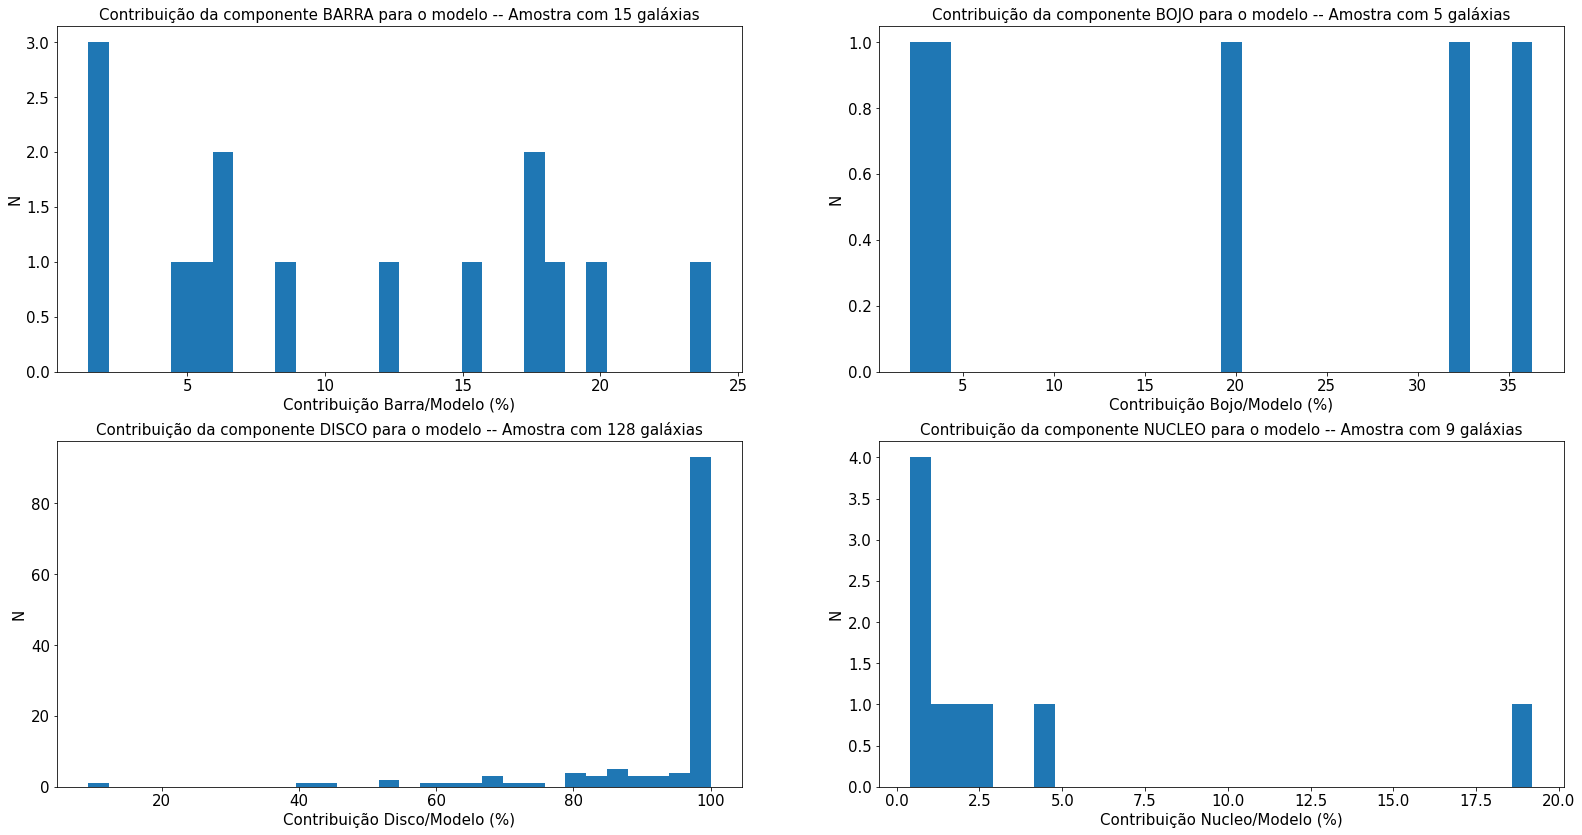

Total de galáxias na análise: 125
12.0 % das galáxias possuem BARRA
4.0 % das galáxias possuem BOJO
102.4 % das galáxias possuem DISCO
7.2 % das galáxias possuem NUCLEO


In [28]:
analise_decomp(s4g_comps_m9_i65_q5, mods=True)

In [33]:
#Massivas
s4g_comps_m9m_i65 = s4g_comps_m9m[s4g_comps_m9m.incl < 65]
noduplicate_m9m_i65 = s4g_comps_m9m_i65.drop_duplicates(subset='Name_1')

s4g_comps_m9m_i65_q5 = s4g_comps_m9m_i65[s4g_comps_m9m_i65.Q == 5] #colocando criterio de qualidade 5
noduplicate_m9m_i65_q5 = s4g_comps_m9m_i65_q5.drop_duplicates(subset='Name_1')

print('Numero de galáxias massivas: ', len(noduplicate_m9m))
print('Numero de galáxias massivas (i<65): ', len(noduplicate_m9m_i65))
print('Numero de galáxias massivas (i<65;q5): ', len(noduplicate_m9m_i65_q5))

Numero de galáxias massivas:  1834
Numero de galáxias massivas (i<65):  877
Numero de galáxias massivas (i<65;q5):  826




Análise de presença de componentes no modelo: 
De uma amostra com 826 galáxias vemos a seguinte presença das componentes: 



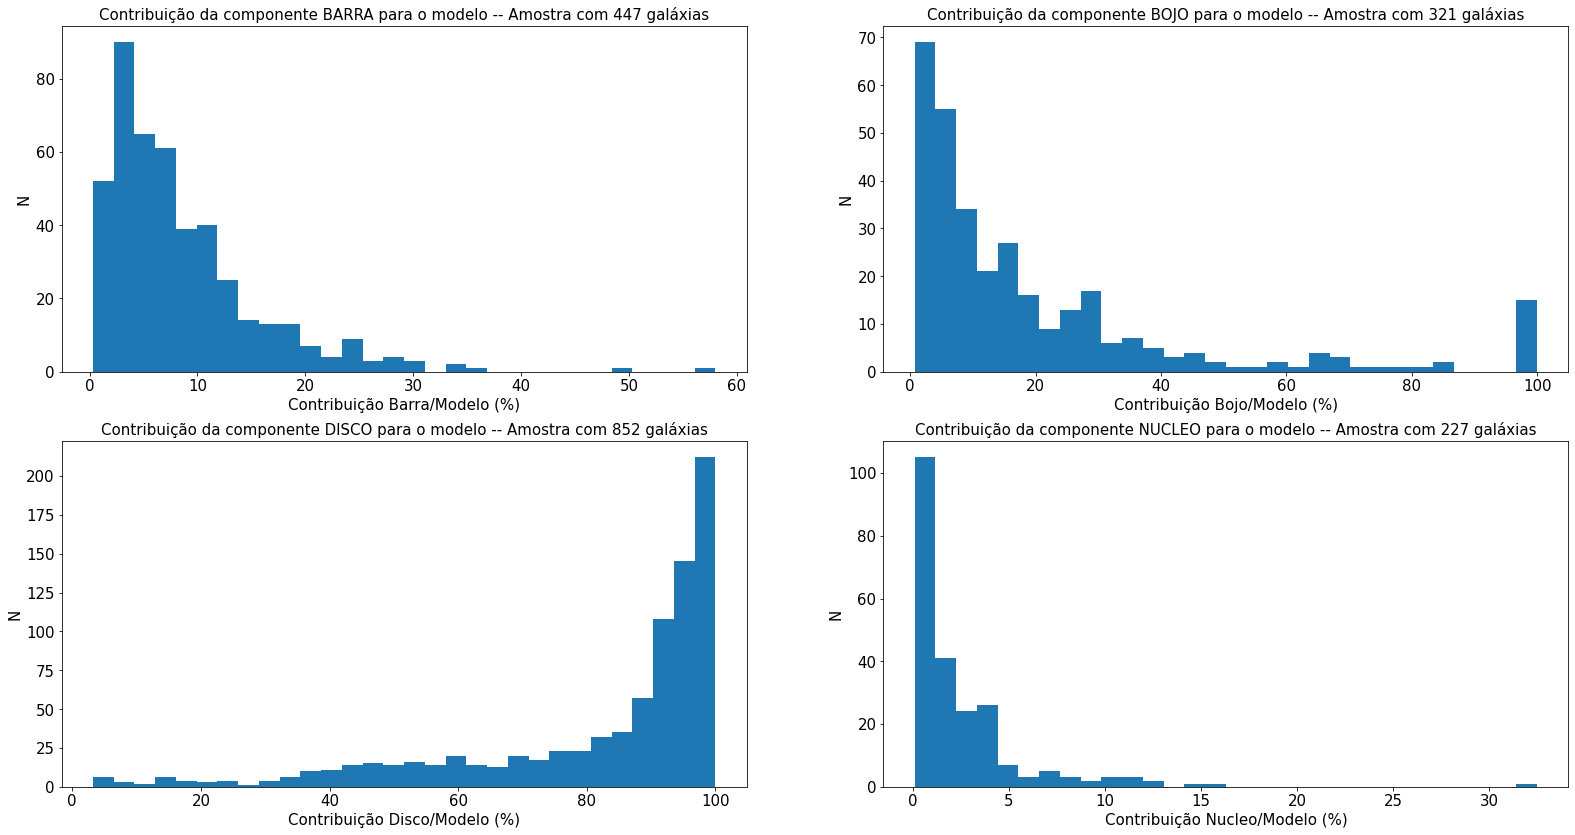

Total de galáxias na análise: 826
54.116222760290555 % das galáxias possuem BARRA
38.86198547215496 % das galáxias possuem BOJO
103.14769975786925 % das galáxias possuem DISCO
27.4818401937046 % das galáxias possuem NUCLEO


In [38]:
analise_decomp(s4g_comps_m9m_i65_q5)

In [35]:
#Massivas Intermediárias
noduplicate_m9_m10 = s4g_comps_m9_m10.drop_duplicates(subset='Name_1')
s4g_comps_m9_m10_i65 = s4g_comps_m9_m10[s4g_comps_m9_m10.incl < 65]
noduplicate_m9_m10_i65 = s4g_comps_m9_m10_i65.drop_duplicates(subset='Name_1')

s4g_comps_m9_m10_i65_q5 = s4g_comps_m9_m10_i65[s4g_comps_m9_m10_i65.Q == 5] #colocando criterio de qualidade 5
noduplicate_m9_m10_i65_q5 = s4g_comps_m9_m10_i65_q5.drop_duplicates(subset='Name_1')

print('Numero de galáxias massivas intermediárias: ', len(noduplicate_m9_m10))
print('Numero de galáxias massivas intermediárias(i<65): ', len(noduplicate_m9_m10_i65))
print('Numero de galáxias massivas intermediárias(i<65;q5): ', len(noduplicate_m9_m10_i65_q5))

Numero de galáxias massivas intermediárias:  965
Numero de galáxias massivas intermediárias(i<65):  411
Numero de galáxias massivas intermediárias(i<65;q5):  393




Análise de presença de componentes no modelo: 
De uma amostra com 393 galáxias vemos a seguinte presença das componentes: 



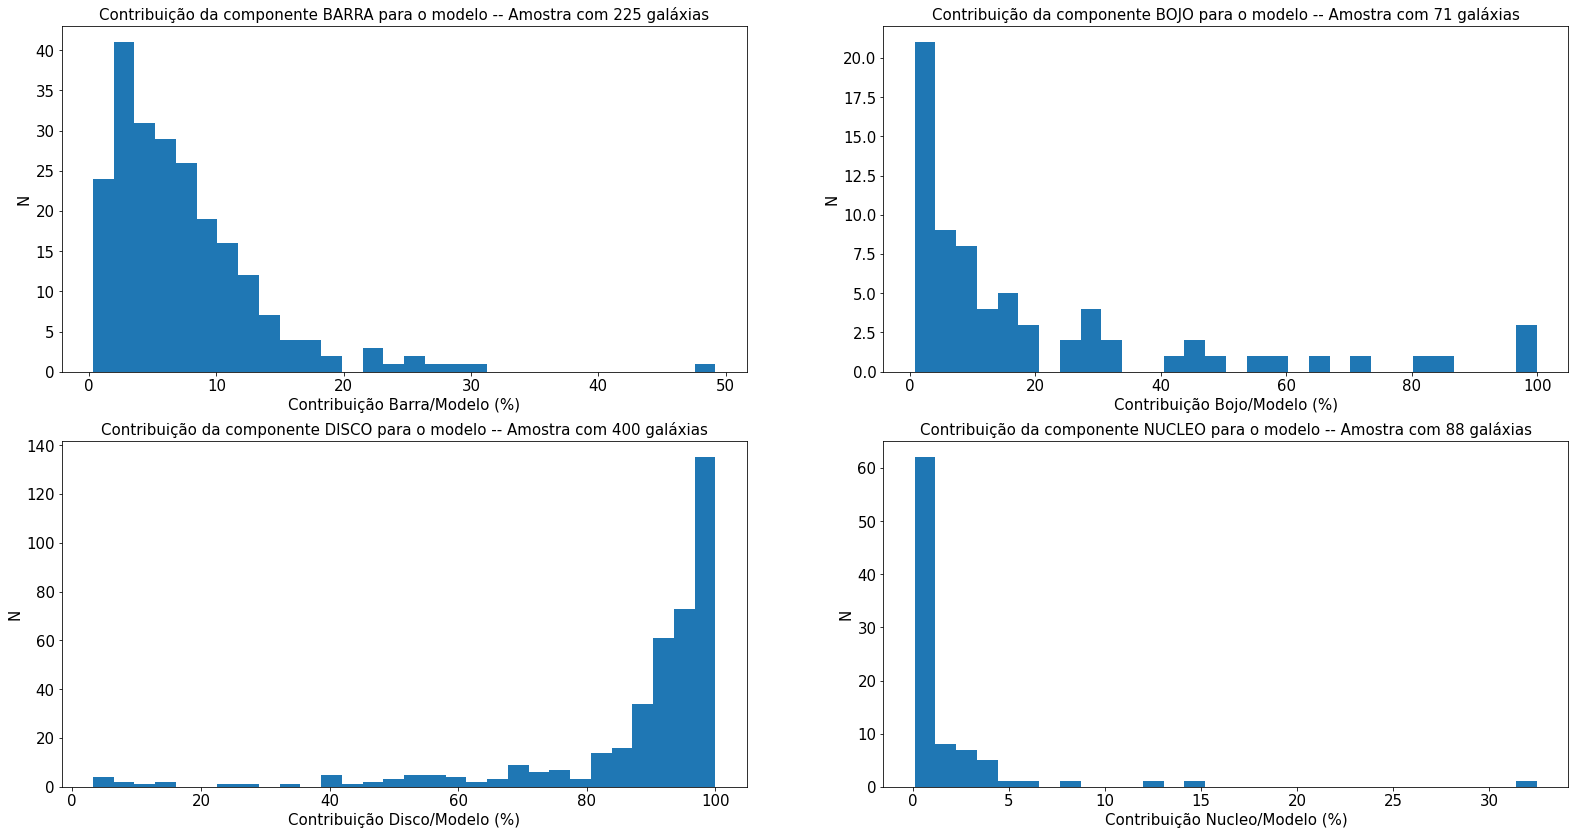

Total de galáxias na análise: 393
57.25190839694657 % das galáxias possuem BARRA
18.06615776081425 % das galáxias possuem BOJO
101.78117048346056 % das galáxias possuem DISCO
22.391857506361323 % das galáxias possuem NUCLEO


In [39]:
analise_decomp(s4g_comps_m9_m10_i65_q5)

In [36]:
#Muito Massivas 
noduplicate_m10 = s4g_comps_m10.drop_duplicates(subset='Name_1')
s4g_comps_m10_i65 = s4g_comps_m10[s4g_comps_m10.incl < 65]
noduplicate_m10_i65 = s4g_comps_m10_i65.drop_duplicates(subset='Name_1')

s4g_comps_m10_i65_q5 = s4g_comps_m10_i65[s4g_comps_m10_i65.Q == 5] #colocando criterio de qualidade 5
noduplicate_m10_i65_q5 = s4g_comps_m10_i65_q5.drop_duplicates(subset='Name_1')

print('Numero de galáxias Muito Massivas: ', len(noduplicate_m10))
print('Numero de galáxias Muito Massivas(i<65): ', len(noduplicate_m10_i65))
print('Numero de galáxias Muito Massivas(i<65;q5): ', len(noduplicate_m10_i65_q5))

Numero de galáxias Muito Massivas:  869
Numero de galáxias Muito Massivas(i<65):  466
Numero de galáxias Muito Massivas(i<65;q5):  433




Análise de presença de componentes no modelo: 
De uma amostra com 433 galáxias vemos a seguinte presença das componentes: 



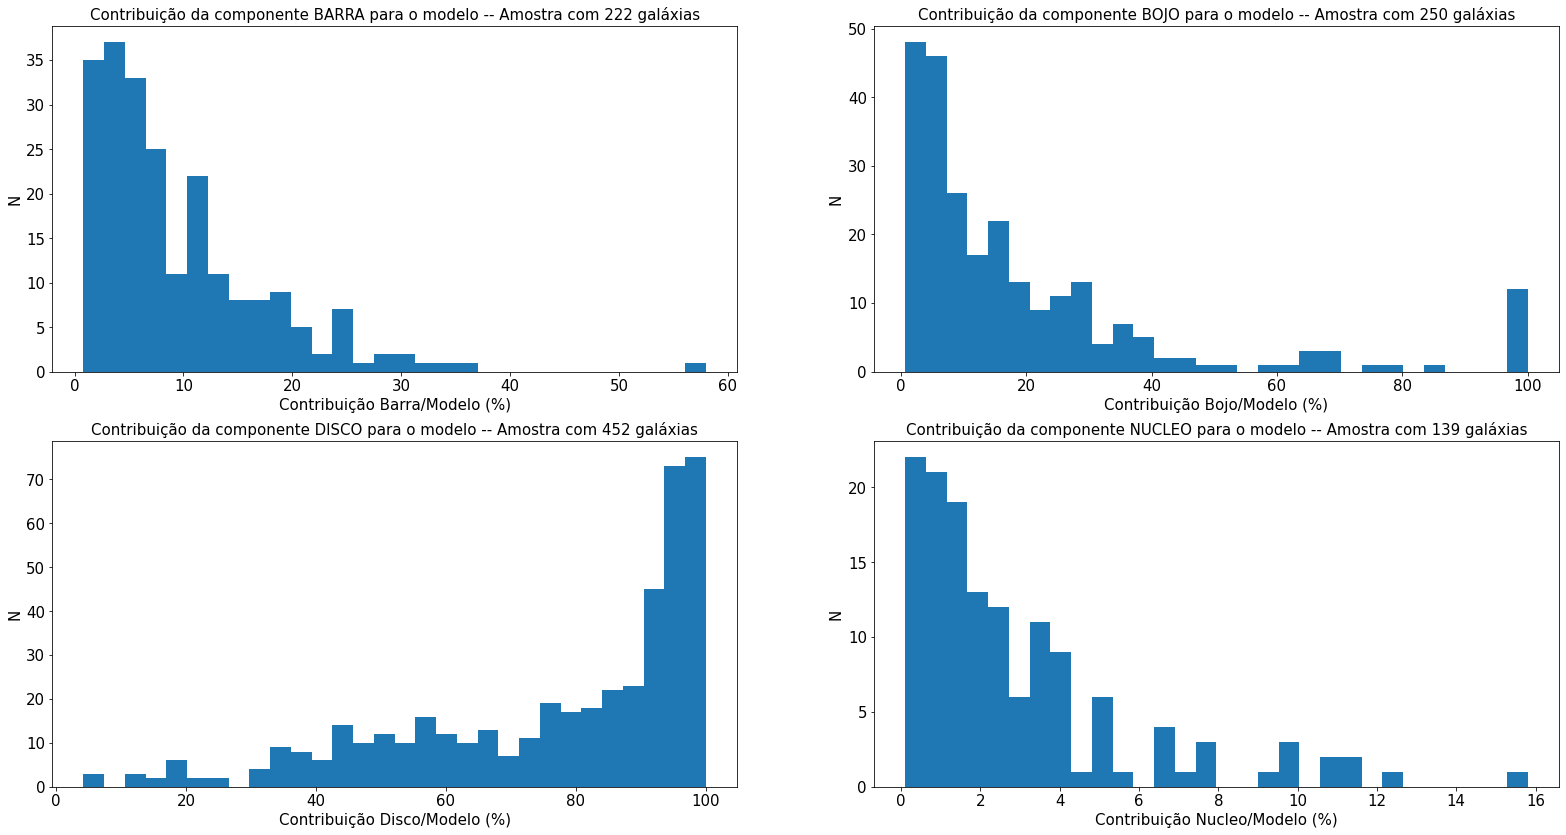

Total de galáxias na análise: 433
51.270207852194 % das galáxias possuem BARRA
57.736720554272516 % das galáxias possuem BOJO
104.38799076212472 % das galáxias possuem DISCO
32.10161662817552 % das galáxias possuem NUCLEO


In [40]:
analise_decomp(s4g_comps_m10_i65_q5)



Análise de presença de componentes no modelo: 
De uma amostra com 40 galáxias vemos a seguinte presença das componentes: 



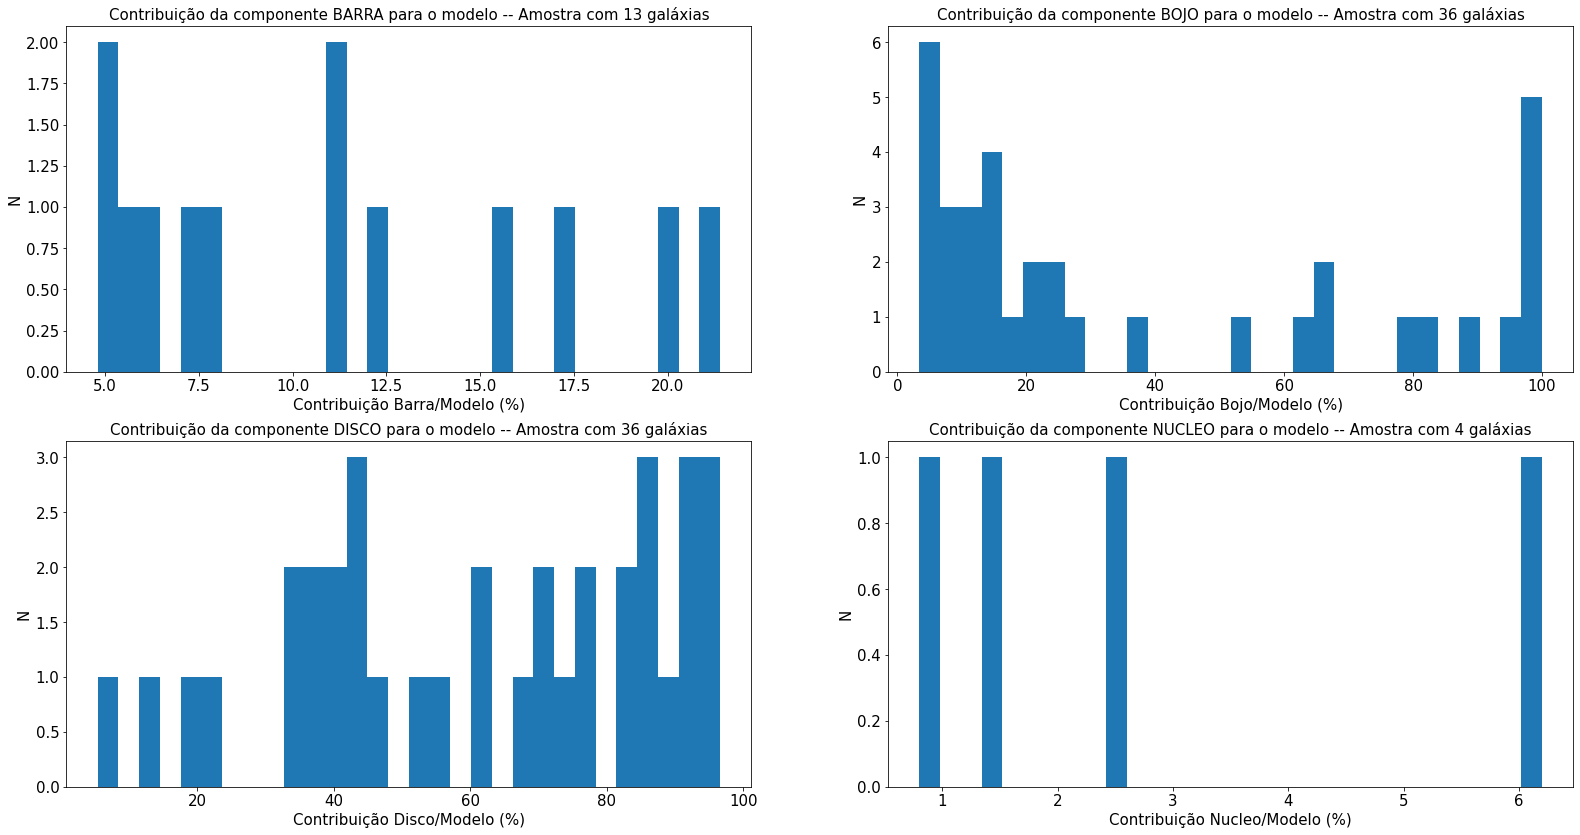

Total de galáxias na análise: 40
32.5 % das galáxias possuem BARRA
90.0 % das galáxias possuem BOJO
90.0 % das galáxias possuem DISCO
10.0 % das galáxias possuem NUCLEO


In [41]:
#BONUS!

#De curiosidade... Galáxias com massa maior que 10^11, sem corte de inclinação ou qualidade 

s4g_comps_m11 = s4g_comps[s4g_comps.mstar >= 11]

analise_decomp(s4g_comps_m11)